In [1]:
import pandas as pd
import numpy as np
import time
import os
import pyarrow as pa
import pyarrow.feather as feather
import pickle
import matplotlib.pyplot as plt
#pytables install!!!! pip install tables

In [6]:
# Dataframe Generation
df = pd.DataFrame(np.random.randn(10000000, 10), columns=[f'col_{i}' for i in range(10)])


In [7]:
def benchmark_save_load(df, file_format, save_func, load_func, file_name):
    # Save the DataFrame
    start_time = time.time()
    save_func(df, file_name)
    save_time = time.time() - start_time

    # Load the DataFrame
    start_time = time.time()
    df_loaded = load_func(file_name)
    load_time = time.time() - start_time

    # Remove the file after benchmarking
    if os.path.exists(file_name):
        os.remove(file_name)
    
    return save_time, load_time

In [8]:
# Benchmark each format
formats = {
    'CSV': {
        'save_func': lambda df, fn: df.to_csv(fn, index=False),
        'load_func': lambda fn: pd.read_csv(fn),
        'file_name': 'test.csv'
    },
    'Parquet': {
        'save_func': lambda df, fn: df.to_parquet(fn),
        'load_func': lambda fn: pd.read_parquet(fn),
        'file_name': 'test.parquet'
    },
    'Feather': {
        'save_func': lambda df, fn: df.to_feather(fn),
        'load_func': lambda fn: pd.read_feather(fn),
        'file_name': 'test.feather'
    },
    'HDF5': {
        'save_func': lambda df, fn: df.to_hdf(fn, key='df', format='table'),
        'load_func': lambda fn: pd.read_hdf(fn),
        'file_name': 'test.h5'
    },
    'Arrow': {
        'save_func': lambda df, fn: feather.write_feather(df, fn),
        'load_func': lambda fn: pd.read_feather(fn),
        'file_name': 'test.arrow'
    },
    'Pickle': {
        'save_func': lambda df, fn: df.to_pickle(fn),
        'load_func': lambda fn: pd.read_pickle(fn),
        'file_name': 'test.pkl'
    }
}

# Store results in a dictionary
results = {}

# Run benchmarks
for fmt, funcs in formats.items():
    save_time, load_time = benchmark_save_load(df, fmt, funcs['save_func'], funcs['load_func'], funcs['file_name'])
    results[fmt] = {'Save Time (s)': save_time, 'Load Time (s)': load_time}


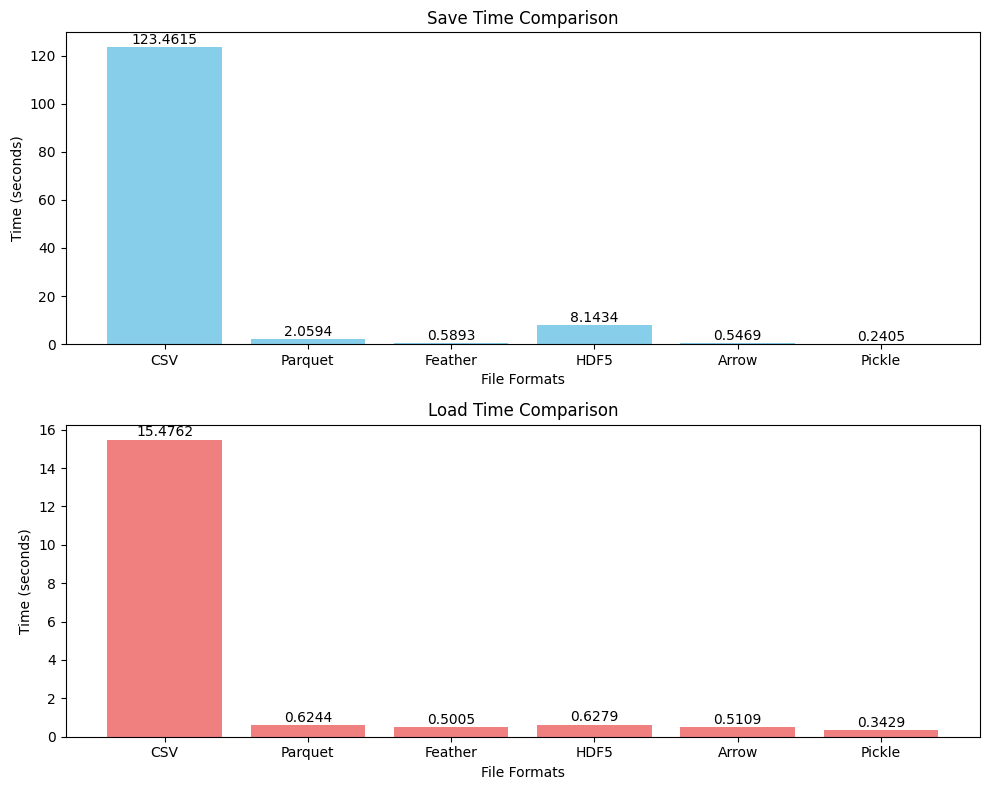

In [11]:
# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Plotting the Save and Load times
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Save Time Plot
ax[0].bar(results_df.index, results_df['Save Time (s)'], color='skyblue')
ax[0].set_title('Save Time Comparison')
ax[0].set_ylabel('Time (seconds)')
ax[0].set_xlabel('File Formats')

# Annotate the bars with the save times
for i, v in enumerate(results_df['Save Time (s)']):
    ax[0].text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')

# Load Time Plot
ax[1].bar(results_df.index, results_df['Load Time (s)'], color='lightcoral')
ax[1].set_title('Load Time Comparison')
ax[1].set_ylabel('Time (seconds)')
ax[1].set_xlabel('File Formats')

# Annotate the bars with the load times
for i, v in enumerate(results_df['Load Time (s)']):
    ax[1].text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')

# Display the plots
plt.tight_layout()
plt.show()

In [12]:
fig.savefig('load_and_save_time_comparison.jpg', format='jpg')


In [13]:
import pandas as pd
import numpy as np
import time
import os
import pyarrow as pa
import pickle
import matplotlib

In [18]:
pa.__version__

'17.0.0'